In [334]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [335]:
df=pd.read_csv('../data/salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [336]:
le=LabelEncoder()
df['company_']=le.fit_transform(df['company'])
df['Job_']=le.fit_transform(df['job'])
df['degree_']=le.fit_transform(df['degree'])

In [337]:
df

,company,job,degree,salary_more_then_100k,company_,Job_,degree_
0,google,sales executive,bachelors,0,2,2,0
1,google,sales executive,masters,0,2,2,1
2,google,business manager,bachelors,1,2,0,0
3,google,business manager,masters,1,2,0,1
4,google,computer programmer,bachelors,0,2,1,0
5,google,computer programmer,masters,1,2,1,1
6,abc pharma,sales executive,masters,0,0,2,1
7,abc pharma,computer programmer,bachelors,0,0,1,0
8,abc pharma,business manager,bachelors,0,0,0,0
9,abc pharma,business manager,masters,1,0,0,1


In [338]:
data=df.drop(['company','job','degree'],axis=1)
data

,salary_more_then_100k,company_,Job_,degree_
0,0,2,2,0
1,0,2,2,1
2,1,2,0,0
3,1,2,0,1
4,0,2,1,0
5,1,2,1,1
6,0,0,2,1
7,0,0,1,0
8,0,0,0,0
9,1,0,0,1


In [339]:
x=data.drop('salary_more_then_100k',axis=1)
y=data['salary_more_then_100k']

In [340]:
company={'abc pharma':0,
         'facebook':1,
         'google':2}

In [341]:
job={'business manager':0,
     'computer programmer':1,
     'sales executive':2}

In [342]:
degree={'bachelors':0,
        'masters':1}

In [343]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [344]:
#default Gini index
model=DecisionTreeClassifier()

In [345]:

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [346]:
# Becouse data very small
model.score(x_test,y_test)

0.25

In [347]:
model.predict([[company['google'],job['sales executive'],degree['bachelors']]])

array([0], dtype=int64)

In [348]:
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 0], dtype=int64)

In [349]:
y_test

10    1
9     1
6     0
11    1
Name: salary_more_then_100k, dtype: int64

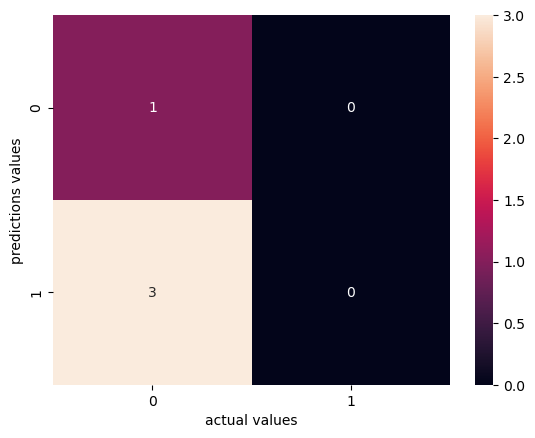

In [350]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('predictions values')
plt.show()

***Descion tree Regression***

In [351]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [352]:
df=fetch_california_housing()

In [353]:
df.data.shape

(20640, 8)

In [354]:
df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [355]:
df.target[:10]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611])

In [356]:
x=df.data
y=df.target

In [357]:
scale=StandardScaler()
X=scale.fit_transform(x)

In [358]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [359]:
model=DecisionTreeRegressor(max_depth=15)

In [360]:
cv=cross_val_score(model,X,y,cv=5,scoring='r2')
np.mean(cv)


0.37349427946791797

In [361]:
model.fit(X,y)

DecisionTreeRegressor(max_depth=15)

In [362]:
model.score(x_train,y_train)

0.9539412456655784

In [363]:
model.score(x_test,y_test)

0.9539758015556591

In [364]:
y_pred=model.predict(x_test)

In [369]:
print(f'MAE={mean_absolute_error(y_test,y_pred)}')
print(f'MSE={mean_squared_error(y_test,y_pred)}')
print('accuracy=',r2_score(y_test,y_pred))

MAE=0.13992963200569175
MSE=0.0620147618447466
accuracy= 0.9539758015556591
